In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data-test-analytics.csv')
df.head()

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,01/14/21 11:23 AM,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,12/31/19 09:53 PM,01/08/21 11:23 AM,NaN,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,07/06/40 12:00 AM,paused,3.30.12,Fernandes,RR,Santa Isabel,01/08/21 11:23 AM,236.991790,4,236.991790,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,03/07/19 11:46 PM,01/07/21 11:23 AM,NaN,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,03/18/63 12:00 AM,active,3.28.9,Lopes,RR,Estrela,01/07/21 11:23 AM,211.955597,13,2331.511572,11,42,organic_search
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,07/21/18 10:17 AM,01/10/21 11:23 AM,NaN,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,11/21/80 12:00 AM,active,3.34.3,Campos do Campo,PE,Confisco,01/10/21 11:23 AM,204.113227,8,1224.679359,6,39,organic_search
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,06/08/18 12:09 PM,01/18/21 11:23 AM,NaN,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,07/07/59 12:00 AM,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,01/18/21 11:23 AM,252.940997,9,2023.527980,8,31,crm


In [14]:
new_df = df.copy()

In [15]:
nasc = new_df.birth_date.str.split(' ', expand=True).get(0)


# definir uma função personalizada para formatar a data
def format_date(date_str):
    year = int(date_str.split('/')[-1])
    if year < 100:
        year += 1900
    return '{}/{}/{}'.format(date_str[:2], date_str[3:5], year)

# aplicar a função na coluna 'birth_date' para formatar a data corretamente
new_df['birth_date'] = nasc.apply(format_date)

# converter a coluna 'birth_date' para datetime, limitando a conversão para anos antes de 2000
new_df['birth_date'] = pd.to_datetime(new_df['birth_date'])

new_df.head()

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,1974-07-10,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,01/14/21 11:23 AM,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,12/31/19 09:53 PM,01/08/21 11:23 AM,NaN,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,1940-07-06,paused,3.30.12,Fernandes,RR,Santa Isabel,01/08/21 11:23 AM,236.991790,4,236.991790,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,03/07/19 11:46 PM,01/07/21 11:23 AM,NaN,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,1963-03-18,active,3.28.9,Lopes,RR,Estrela,01/07/21 11:23 AM,211.955597,13,2331.511572,11,42,organic_search
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,07/21/18 10:17 AM,01/10/21 11:23 AM,NaN,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,1980-11-21,active,3.34.3,Campos do Campo,PE,Confisco,01/10/21 11:23 AM,204.113227,8,1224.679359,6,39,organic_search
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,06/08/18 12:09 PM,01/18/21 11:23 AM,NaN,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,1959-07-07,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,01/18/21 11:23 AM,252.940997,9,2023.527980,8,31,crm


In [16]:
datas = ['created_at', 'updated_at', 'deleted_at', 'last_date_purchase']

for v, k in enumerate(datas):
    new_df[k] = pd.to_datetime(df[k]).copy()

In [17]:
new_df.drop(['id', 'name_hash', 'email_hash', 'address_hash', 'updated_at'], axis=1, inplace=True)
new_df['time_lastbuy'] = (new_df['deleted_at'] - new_df['last_date_purchase']).dt.days
new_df['client_cancel_age'] = (new_df['deleted_at'] - new_df['birth_date']).dt.days/365
new_df['age_lastbuy'] = (new_df['last_date_purchase'] - new_df['birth_date']).dt.days/365
new_df['client_time'] = (new_df['deleted_at'] - new_df['created_at']).dt.days
new_df.head()

,created_at,deleted_at,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source,time_lastbuy,client_cancel_age,age_lastbuy,client_time
0,2017-08-15 07:05:00,NaT,1974-07-10,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,2021-01-14 11:23:00,151.142942,10,906.857651,6,35,crm,NaN,NaN,46.547945,NaN
1,2019-12-31 21:53:00,NaT,1940-07-06,paused,3.30.12,Fernandes,RR,Santa Isabel,2021-01-08 11:23:00,236.991790,4,236.991790,1,41,organic_search,NaN,NaN,80.564384,NaN
2,2019-03-07 23:46:00,NaT,1963-03-18,active,3.28.9,Lopes,RR,Estrela,2021-01-07 11:23:00,211.955597,13,2331.511572,11,42,organic_search,NaN,NaN,57.849315,NaN
3,2018-07-21 10:17:00,NaT,1980-11-21,active,3.34.3,Campos do Campo,PE,Confisco,2021-01-10 11:23:00,204.113227,8,1224.679359,6,39,organic_search,NaN,NaN,40.164384,NaN
4,2018-06-08 12:09:00,NaT,1959-07-07,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,2021-01-18 11:23:00,252.940997,9,2023.527980,8,31,crm,NaN,NaN,61.578082,NaN


In [29]:
new_df['client_time'].describe()

count     505.000000
mean      471.700990
std       423.662606
min         0.000000
25%       133.000000
50%       322.000000
75%       750.000000
max      1771.000000
Name: client_time, dtype: float64

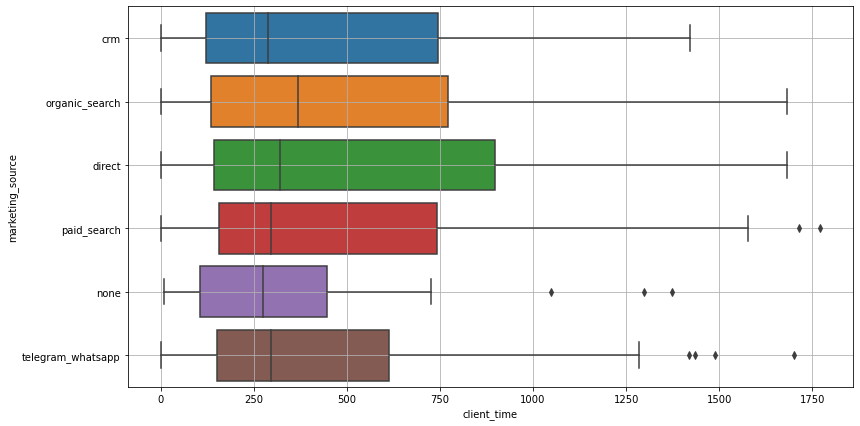

In [28]:
plt.figure(figsize=(13,7))
sns.boxplot(x='client_time', y='marketing_source', data=new_df)
plt.grid()

In [53]:
(new_df[new_df['status'] == 'canceled']['state'].value_counts()
 /new_df[new_df['status'] == 'canceled']['state'].value_counts().sum())*100

RS    4.950495
TO    4.752475
SE    4.752475
MT    4.752475
MA    4.554455
AM    4.554455
RR    4.554455
AL    4.356436
PA    4.356436
GO    4.158416
BA    3.960396
PE    3.960396
MS    3.960396
MG    3.762376
CE    3.762376
RO    3.366337
PR    3.366337
SP    3.168317
RJ    3.168317
AC    3.168317
RN    2.970297
DF    2.970297
AP    2.970297
PB    2.772277
ES    2.376238
SC    2.376238
PI    2.178218
Name: state, dtype: float64

In [49]:
# Dicionário de correspondência entre siglas e regiões
region_dict = {'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte', 'AM': 'Norte', 'BA': 'Nordeste',
               'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste', 'GO': 'Centro-Oeste',
               'MA': 'Nordeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste', 'MG': 'Sudeste',
               'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul', 'PE': 'Nordeste', 'PI': 'Nordeste',
               'RJ': 'Sudeste', 'RN': 'Nordeste', 'RS': 'Sul', 'RO': 'Norte', 'RR': 'Norte',
               'SC': 'Sul', 'SP': 'Sudeste', 'SE': 'Nordeste', 'TO': 'Norte'}

# Mapeia as siglas dos estados para as regiões do Brasil
new_df['region'] = new_df['state'].map(region_dict)

In [51]:
(new_df[new_df['status'] == 'canceled']['region'].value_counts()/
 new_df[new_df['status'] == 'canceled']['region'].value_counts().sum())*100

Nordeste        33.267327
Norte           27.722772
Centro-Oeste    15.841584
Sudeste         12.475248
Sul             10.693069
Name: region, dtype: float64

In [65]:
new_df['status_v2'] = new_df['status'].map({'active': 0, 'canceled': 1, 'paused': 0}).astype(int)
new_df["month_year_cancel"] = new_df["deleted_at"].dt.strftime("%Y-%m")

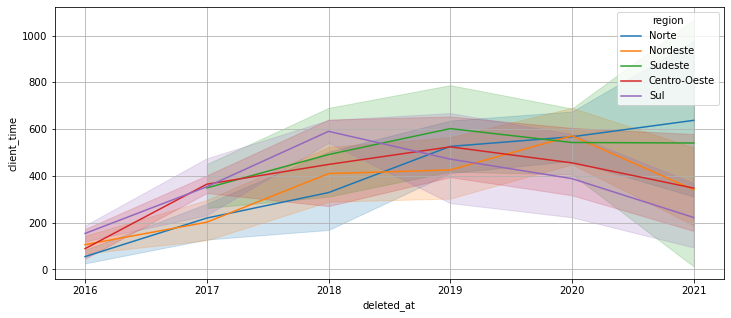

In [85]:
plt.figure(figsize=(12,5))
sns.lineplot(x=new_df['deleted_at'].dt.year, y='client_time', hue='region',data=new_df)
plt.grid();

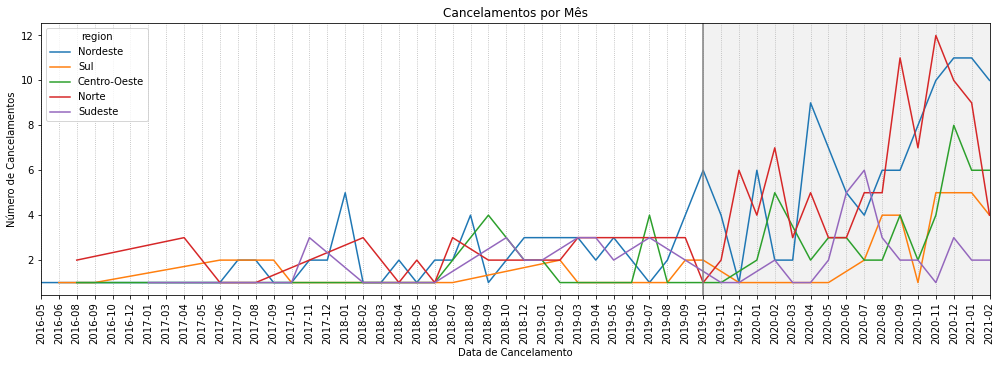

In [217]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_cancel', y='status', 
             hue='region', 
             data=new_df.groupby(['month_year_cancel', 'region']).count().reset_index())

plt.xlabel('Data de Cancelamento')
plt.ylabel('Número de Cancelamentos')
plt.xticks(rotation=90)
plt.xlim('2016-05', '2021-02')

plt.axvline('2019-10', color='gray')
plt.axvspan('2019-10', '2021-02', alpha=0.1, color='gray')


plt.title('Cancelamentos por Mês')

plt.grid(linestyle=':', axis='x');

In [ ]:
new_df['version'] = new_df['version'].str.split('.', expand=True).get(0).astype(int)
new_df.head()

In [96]:
pos_1019 = new_df[new_df['month_year_cancel'] >= '2019-10']
antes_1019 = new_df[new_df['month_year_cancel'] < '2019-10']

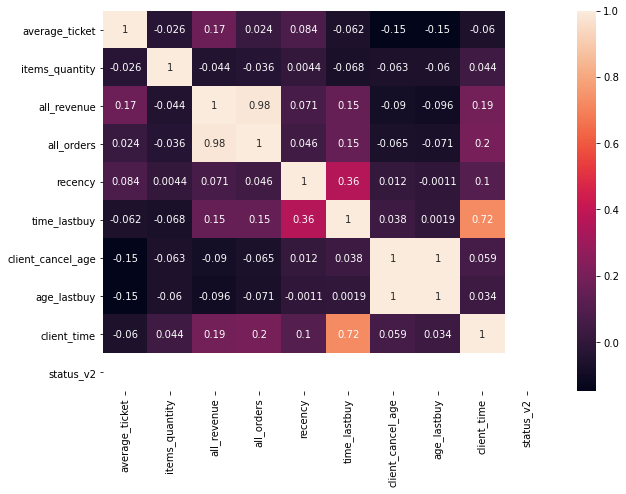

In [229]:
plt.figure(figsize=(10,7))
sns.heatmap(antes_1019.corr(), annot=True);

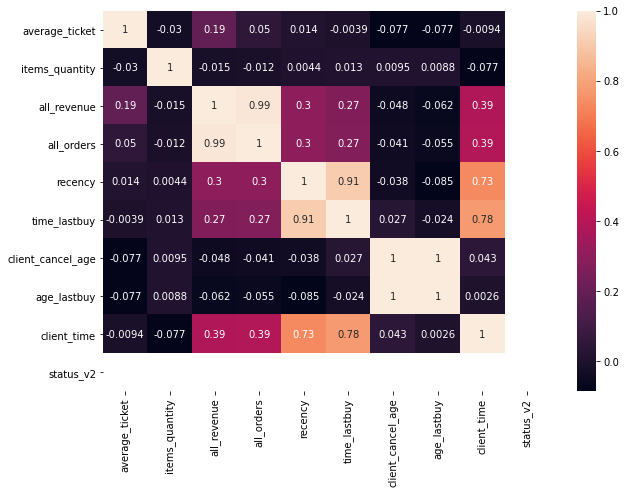

In [228]:
plt.figure(figsize=(10,7))
sns.heatmap(pos_1019.corr(), annot=True);

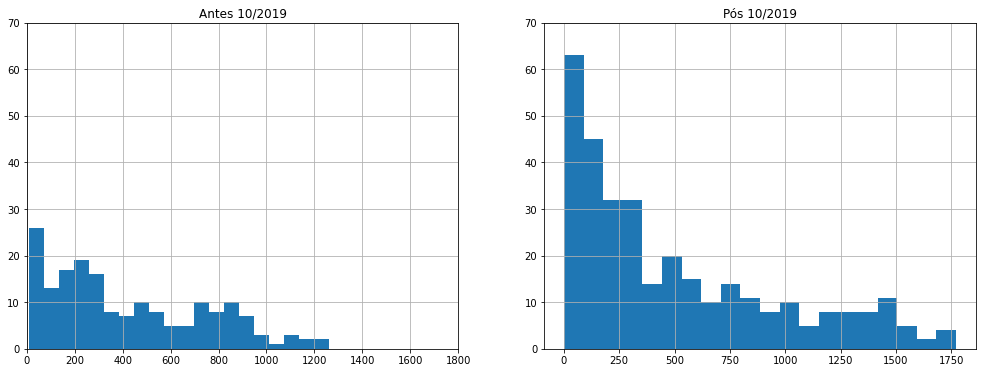

In [208]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 6))

ax[0].hist(x=antes_1019['client_time'], bins=20)
ax[0].set_title('Antes 10/2019')
ax[0].grid()
ax[0].set_ylim(0,70)
ax[0].set_xlim(0,1800)

ax[1].hist(x=pos_1019['client_time'], bins=20)
ax[1].set_title('Pós 10/2019')
ax[1].grid()
ax[1].set_ylim(0,70)
ax[0].set_xlim(0,1800);

In [ ]:
pd.pivot_table(new_df,index="month_year_last_purchase", 
                            columns="status",
                            aggfunc="count",
                            values='all_orders',
                            fill_value=0)

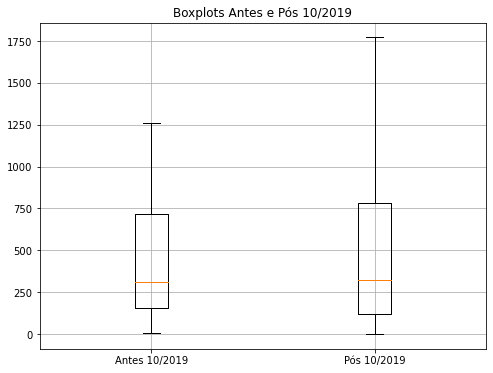

In [216]:
fig, ax = plt.subplots(figsize=(8,6))

data = [antes_1019['client_time'], pos_1019['client_time']]

positions = [1, 2] # posição de cada boxplot no eixo x

ax.boxplot(data, positions=positions)

ax.set_xticks(positions)
ax.set_xticklabels(['Antes 10/2019', 'Pós 10/2019'])
ax.set_title('Boxplots Antes e Pós 10/2019')
ax.grid(True)

plt.show()

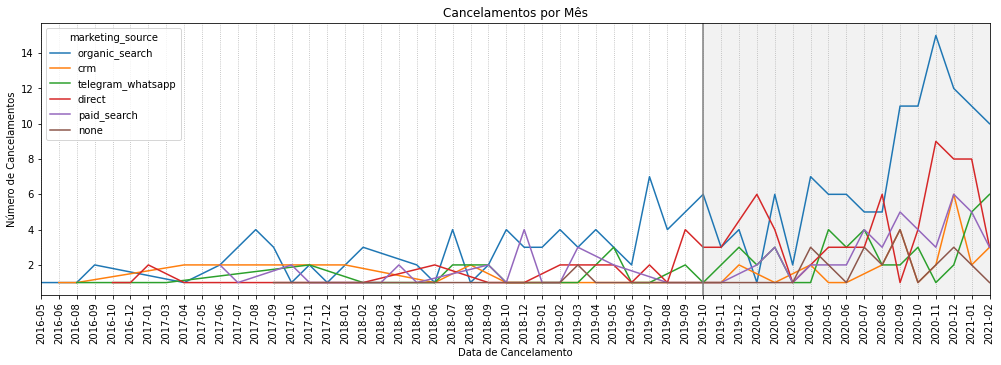

In [222]:
plt.figure(figsize=(17,5))
sns.lineplot(x='month_year_cancel', y='status', 
             hue='marketing_source', 
             data=new_df.groupby(['month_year_cancel', 'marketing_source']).count().reset_index())

plt.xlabel('Data de Cancelamento')
plt.ylabel('Número de Cancelamentos')
plt.xticks(rotation=90)
plt.xlim('2016-05', '2021-02')

plt.axvline('2019-10', color='gray')
plt.axvspan('2019-10', '2021-02', alpha=0.1, color='gray')

plt.title('Cancelamentos por Mês')

plt.grid(linestyle=':', axis='x');

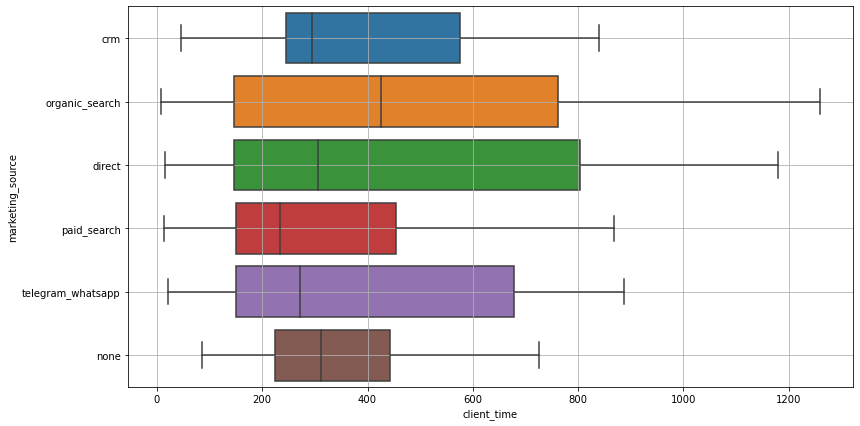

In [223]:
plt.figure(figsize=(13,7))
sns.boxplot(x='client_time', y='marketing_source', data=antes_1019)
plt.grid()

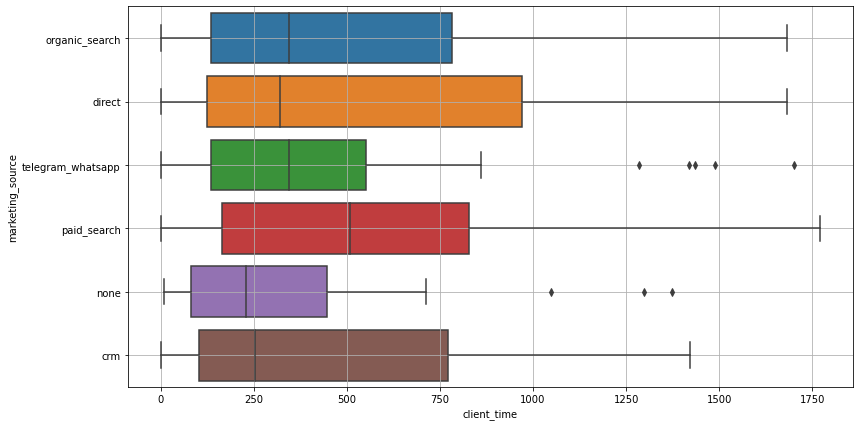

In [224]:
plt.figure(figsize=(13,7))
sns.boxplot(x='client_time', y='marketing_source', data=pos_1019)
plt.grid()

In [ ]:
new_df.to_csv('teste.csv')

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='revenue/orders', y='status', data=new_df)
plt.grid();

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(new_df['time_lastbuy'], color='purple')
plt.grid();

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(new_df['recency'].where(new_df['status'] == 'paused'), color='magenta')
plt.grid();

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(new_df['client_cancel_age'], color='orange')
plt.grid();

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='items_quantity', y='status', data=new_df)
plt.grid();

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='all_orders', y='status', data=new_df)
plt.grid();

In [ ]:
new_df.describe()

In [ ]:
new_df['status'].value_counts()

In [ ]:
pausado = new_df[new_df['status'] == 'paused']
ativo = new_df[new_df['status'] == 'active']
cancelado = new_df[new_df['status'] == 'canceled'] 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize=(12,8))

sns.heatmap(cancelado.corr(), annot=True)

In [ ]:
new_df.head()

In [ ]:
df_ml = new_df.copy()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

df_ml.drop(['created_at', 'deleted_at', 'birth_date', 
            'version', 'city', 'state', 'neighborhood',
           'last_date_purchase', 'average_ticket', 
            'time_lastbuy', 'client_cancel_age', 'revenue/orders'], axis=1, inplace=True)

df_ml = df_ml[df_ml['status'] != 'paused']

df_ml['status'] = df_ml['status'].map({'active': 0,
                                       'canceled': 1})

X = df_ml.drop('status', axis=1)
X = pd.get_dummies(X)
y = df_ml['status']

In [ ]:
X.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X)
X_pca = pca.transform(X)

In [ ]:
X_pca.shape

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, stratify=y, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

In [ ]:
logreg.score(X_test, y_test)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn import metrics

sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
skf = StratifiedKFold(5)

param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

grid_log = GridSearchCV(logreg, cv=skf, verbose=2, param_grid=param_grid,scoring = 'recall')
grid_log.fit(X_train, y_train)
grid_log.best_score_

In [ ]:
y_pred_2 = grid_log.predict(X_test)

sns.heatmap(metrics.confusion_matrix(y_test, y_pred_2), annot=True)

In [ ]:
model = grid_log.best_estimator_

In [ ]:
pd.DataFrame(model.coef_)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
y_pred_etc = etc.predict(X_test)

metrics.recall_score(y_test, y_pred_etc)

In [ ]:
metrics.confusion_matrix(y_test, y_pred_2)

In [ ]:
pd.DataFrame(etc.feature_importances_).sort_values(0, ascending=False)

In [ ]:
from sklearn.metrics import 